## Clone, install, import

In [ ]:
%pip install -r ../requirements.txt -q
import ucto
ucto.installdata()
%run ../src/utils.py
%run ../src/preprocessing.py


## Download

In [1]:
%run ../src/utils.py

create_if_absent("planimals/data/dbnl_xml")
download_and_unzip(url = "https://www.dbnl.org/letterkunde/pd/xml_pd.zip", output_dir = "../data/dbnl_xml")

/home/avandalfse/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Directory planimals/data/dbnl_xml already exists


## XML to txt

In [2]:
%run ../src/preprocessing.py

html_to_decimal_dict = make_html_entity_dict()
addition =  additional_declaration_str(html_to_decimal_dict, '.dtd"')
add_declaration_to_xml('../data/dbnl_xml', '<!DOCTYPE', '.dtd"', addition)

In [3]:
create_if_absent("../data/dbnl_txt")
dbnl_to_txt("../data/dbnl_xml", "../data/dbnl_txt")

Directory ../data/dbnl_txt created
file teen002bijz01 could not be parsed: Entity 'lsquo' not defined, line 494, column 375 (teen002bijz01_01.xml, line 494)
file hugo001piad01 could not be parsed: Entity 'lsquo' not defined, line 2622, column 11 (hugo001piad01_01.xml, line 2622)
file vaen001quin01 could not be parsed: Entity 'Sigma' not defined, line 310, column 75 (vaen001quin01_01.xml, line 310)
file vry_001anat01 could not be parsed: Start tag expected, '<' not found, line 2, column 1 (vry_001anat01_01.xml, line 2)
file _gid001183901 could not be parsed: Entity 'lsquo' not defined, line 334, column 59 (_gid001183901_01.xml, line 334)
file luyk001jezu01 could not be parsed: Entity 'dagger' not defined, line 576, column 79 (luyk001jezu01_01.xml, line 576)
file aa__001biog02 could not be parsed: Entity 'lsquo' not defined, line 129, column 48 (aa__001biog02_01.xml, line 129)
file herl001besc01 could not be parsed: Entity 'lsquo' not defined, line 1398, column 8 (herl001besc01_01.xml, l

## Txt to folia

In [7]:
create_if_absent("../data/dbnl_folia")
txt_to_folia("../data/dbnl_txt", "../data/dbnl_folia")

Directory ../data/dbnl_folia already exists


Looping through text files: 100%|██████████| 3442/3442 [00:00<00:00, 200174.63it/s]


## Folia to csv

In [ ]:
create_if_absent("../data/dbnl_sentences")
folia_files = select_all_files("../data/dbnl_folia", "folia.xml")

# Directory and checkpoint file setup
output_folder = '../data/dbnl_sentences'
checkpoint_file = 'processed_files.txt'
# Load processed files from checkpoint
processed_files = set(load_checkpoint(checkpoint_file))

for index, f in enumerate(tqdm.tqdm(folia_files, desc="making df"), start=1):
    if f not in processed_files:
        df = folia_to_df(f)  # Assuming folia_to_df returns a DataFrame

        # Save the dataframe
        filename = f"df_{index}.csv"  # or use .pkl for pickle format
        filepath = os.path.join(output_folder, filename)
        df.to_csv(filepath, index=False)  # Use df.to_pickle(filepath) for pickle format

        # Update processed files list and checkpoint
        processed_files.add(f)
        save_checkpoint(processed_files, checkpoint_file)


Directory ../data/dbnl_sentences already exists


making df:   0%|          | 3/3442 [00:39<15:32:32, 16.27s/it]

Error processing file ../data/dbnl_folia/_die003185501.folia.xml: No features in text.


WARNING!!! Document uses a newer version of FoLiA than this library! (2.5.3 vs 2.5.1). Any possible subsequent failures in parsing or processing may probably be attributed to this. Upgrade foliapy to remedy this.
making df:   0%|          | 7/3442 [04:25<69:02:34, 72.36s/it]

Error processing file ../data/dbnl_folia/_gid001186901.folia.xml: No features in text.


WARNING!!! Document uses a newer version of FoLiA than this library! (2.5.3 vs 2.5.1). Any possible subsequent failures in parsing or processing may probably be attributed to this. Upgrade foliapy to remedy this.
making df:   0%|          | 8/3442 [06:44<89:11:42, 93.51s/it]

Error processing file ../data/dbnl_folia/_vad003186501.folia.xml: No features in text.


WARNING!!! Document uses a newer version of FoLiA than this library! (2.5.3 vs 2.5.1). Any possible subsequent failures in parsing or processing may probably be attributed to this. Upgrade foliapy to remedy this.
making df:   1%|          | 21/3442 [10:22<17:48:45, 18.74s/it]

Error processing file ../data/dbnl_folia/juni002bata01.folia.xml: No features in text.


WARNING!!! Document uses a newer version of FoLiA than this library! (2.5.3 vs 2.5.1). Any possible subsequent failures in parsing or processing may probably be attributed to this. Upgrade foliapy to remedy this.
making df:   2%|▏         | 66/3442 [24:17<8:09:33,  8.70s/it]WARNING!!! Document uses a newer version of FoLiA than this library! (2.5.3 vs 2.5.1). Any possible subsequent failures in parsing or processing may probably be attributed to this. Upgrade foliapy to remedy this.


## Diagnostics

In [5]:
folder_paths = ['../data/dbnl_xml', '../data/dbnl_txt', '../data/dbnl_folia', '../data/dbnl_sentences']

for p in folder_paths:
    num_files = count_files_in_folder(p)
    print(f"Number of files in '{p}': {num_files}")

Number of files in '../data/dbnl_xml': 3458
Number of files in '../data/dbnl_txt': 3442
Number of files in '../data/dbnl_folia': 3451
Number of files in '../data/dbnl_sentences': 3444


Error processing file df_712.csv: No columns to parse from file
Error processing file df_108.csv: No columns to parse from file
Error processing file df_2710.csv: No columns to parse from file
Error processing file df_3169.csv: No columns to parse from file
Error processing file df_633.csv: No columns to parse from file
Error processing file df_2783.csv: No columns to parse from file
Error processing file df_2053.csv: No columns to parse from file
Error processing file df_240.csv: No columns to parse from file
Error processing file df_1426.csv: No columns to parse from file
Error processing file df_1809.csv: No columns to parse from file
Error processing file df_181.csv: No columns to parse from file
Error processing file df_253.csv: No columns to parse from file
Error processing file df_1542.csv: No columns to parse from file
Error processing file df_2904.csv: No columns to parse from file
Error processing file df_1982.csv: No columns to parse from file
Error processing file df_1187.c

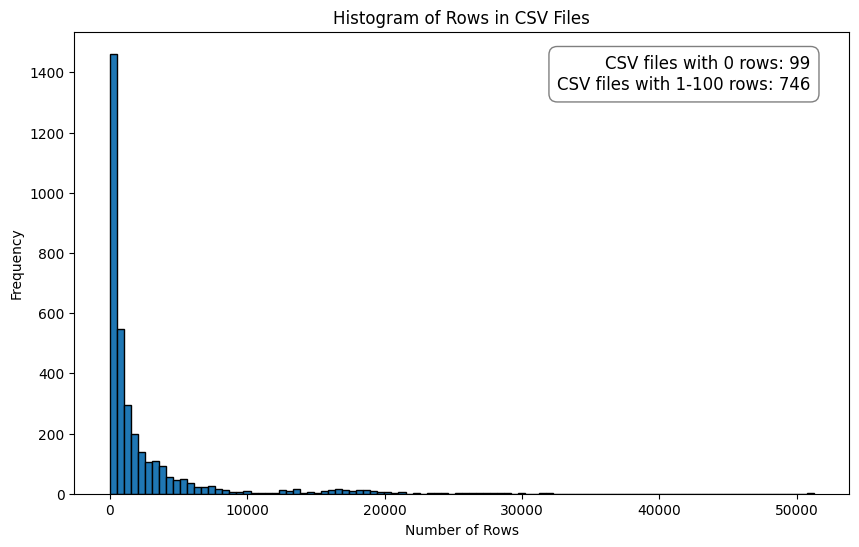

In [14]:
import matplotlib.pyplot as plt

# Replace with the actual path to your folder containing CSV files
folder_path = '../data/dbnl_sentences/'
csv_files = [file for file in list_extension_files(folder_path, "csv")]

zero_row_files = 0
one_to_hundred_row_files = 0

# List to store the number of rows in each CSV file
rows_count = []

# Read each CSV file and count the number of rows
for file in csv_files:
    try:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        num_rows = len(df)
        rows_count.append(num_rows)

        # Update counters
        if num_rows == 0:
            zero_row_files += 1
        elif 1 <= num_rows <= 100:
            one_to_hundred_row_files += 1

    except Exception as e:
        print(f"Error processing file {file}: {e}")
        rows_count.append(0)
        zero_row_files += 1

# Create a histogram of the number of rows
plt.figure(figsize=(10, 6))
plt.hist(rows_count, bins=100, edgecolor='black')
plt.title('Histogram of Rows in CSV Files')
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')

# Adding a text box for the zero row and 1-100 row info
info_text = f"CSV files with 0 rows: {zero_row_files}\n" \
            f"CSV files with 1-100 rows: {one_to_hundred_row_files}"
plt.gca().text(0.95, 0.95, info_text, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.5))

plt.show()

## Clean csv's and put together

Cleaning means:
* check if a row in the csv is a sentence (else: discard);
* check if the sentence is Dutch (else: discard);
* remove duplicates.

This is done per chunk to make it less computationally heavy.

In [43]:
output_dir = "../data/chunks"
create_if_absent(output_dir)

# Assuming all your dataframe names or paths are in a list
all_dataframe_paths = [os.path.join("../data/dbnl_sentences", p) for p in list_extension_files("../data/dbnl_sentences", "csv")]
chunk_size = 500  # Adjust this based on your system's capability
processed_chunks = []

for i in range(0, len(all_dataframe_paths), chunk_size):
    chunk_paths = all_dataframe_paths[i:i + chunk_size]
    chunk_dfs = []
    for path in chunk_paths:
        try:
            df = pd.read_csv(path)
            if not df.empty and df.columns.size > 0:  # Check if dataframe has columns
                chunk_dfs.append(df)
            else:
                print(f"DataFrame from {path} is empty or has no columns.")
        except FileNotFoundError as e:
            print(f"File not found: {path}")
        except pd.errors.EmptyDataError:
            print(f"No data in file: {path}")
        except Exception as e:
            print(f"Error reading file {path}: {e}")
    
    if chunk_dfs:
        processed_chunk = process_chunk(chunk_dfs)
        chunk_name = f'processed_chunk_{i // chunk_size}.csv'
        f_path = os.path.join(output_dir, chunk_name)
        processed_chunk.to_csv(f_path, index=False)
        processed_chunks.append(f'processed_chunk_{i // chunk_size}.csv')
        
# Finally, combine, shuffle, and batch the processed chunks
final_df = pd.concat([pd.read_csv(f'../data/chunks/{chunk}') for chunk in processed_chunks])
final_df_no_duplicates = final_df.drop_duplicates(subset='sentences')
final_shuffled_df = final_df_no_duplicates.sample(frac=1).reset_index(drop=True)

Directory ../data/chunks already exists
DataFrame from ../data/dbnl_sentences/df_1302.csv is empty or has no columns.
No data in file: ../data/dbnl_sentences/df_712.csv
No data in file: ../data/dbnl_sentences/df_108.csv
No data in file: ../data/dbnl_sentences/df_2710.csv
No data in file: ../data/dbnl_sentences/df_3169.csv
No data in file: ../data/dbnl_sentences/df_633.csv
No data in file: ../data/dbnl_sentences/df_2783.csv
No data in file: ../data/dbnl_sentences/df_2053.csv
No data in file: ../data/dbnl_sentences/df_240.csv
DataFrame from ../data/dbnl_sentences/df_851.csv is empty or has no columns.
No data in file: ../data/dbnl_sentences/df_1426.csv
No data in file: ../data/dbnl_sentences/df_1809.csv
No data in file: ../data/dbnl_sentences/df_181.csv
No data in file: ../data/dbnl_sentences/df_253.csv
DataFrame from ../data/dbnl_sentences/df_2125.csv is empty or has no columns.
No data in file: ../data/dbnl_sentences/df_1542.csv
No data in file: ../data/dbnl_sentences/df_2904.csv
No da

## Save in batches of 100.000

In [46]:
create_if_absent("../data/sentence_batches")
batch_size = 100000
for i in range(0, len(final_shuffled_df), batch_size):
    batch = final_shuffled_df.iloc[i:i + batch_size]
    batch.to_csv(f'../data/sentence_batches/final_batch_{i // batch_size}.csv', index=False)

Directory ../data/sentence_batches created


## Diagnostics

In [ ]:
folder_paths = ['../data/dbnl_xml', '../data/dbnl_txt', '../data/dbnl_folia', '../data/dbnl_sentences']

for p in folder_paths:
    num_files = count_files_in_folder(p)
    print(f"Number of files in '{p}': {num_files}")